In [5]:
import pandas as pd
import numpy as np
import datetime as dt
# 1.读取
s_data = pd.read_csv('air_data.csv',header=0)
s_data

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,18375,2011/5/20,2013/6/5,女,4,广州,广东,CN,25.0,2014/3/31,...,12318,12318,12123,12318,12123,1.000000,0.000000,0.000000,0.000000,22
62984,36041,2010/3/8,2013/9/14,男,4,佛山,广东,CN,38.0,2014/3/31,...,106972,106972,56506,106972,56506,1.000000,0.000000,0.000000,0.000000,43
62985,45690,2006/3/30,2006/12/2,女,4,广州,广东,CN,43.0,2014/3/31,...,0,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0
62986,61027,2013/2/6,2013/2/14,女,4,广州,广东,CN,36.0,2014/3/31,...,0,0,0,0,0,0.000000,1.000000,0.000000,0.000000,0


In [6]:
# 2.各列数据值情况
s_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MEMBER_NO                62988 non-null  int64  
 1   FFP_DATE                 62988 non-null  object 
 2   FIRST_FLIGHT_DATE        62988 non-null  object 
 3   GENDER                   62985 non-null  object 
 4   FFP_TIER                 62988 non-null  int64  
 5   WORK_CITY                60719 non-null  object 
 6   WORK_PROVINCE            59740 non-null  object 
 7   WORK_COUNTRY             62962 non-null  object 
 8   AGE                      62568 non-null  float64
 9   LOAD_TIME                62988 non-null  object 
 10  FLIGHT_COUNT             62988 non-null  int64  
 11  BP_SUM                   62988 non-null  int64  
 12  EP_SUM_YR_1              62988 non-null  int64  
 13  EP_SUM_YR_2              62988 non-null  int64  
 14  SUM_YR_1              

In [7]:
# object的数值特征
s_data.describe(include='object')
s = s_data.describe(percentiles=[],include='all').T
s['count']

MEMBER_NO                  62988.0
FFP_DATE                     62988
FIRST_FLIGHT_DATE            62988
GENDER                       62985
FFP_TIER                   62988.0
WORK_CITY                    60719
WORK_PROVINCE                59740
WORK_COUNTRY                 62962
AGE                        62568.0
LOAD_TIME                    62988
FLIGHT_COUNT               62988.0
BP_SUM                     62988.0
EP_SUM_YR_1                62988.0
EP_SUM_YR_2                62988.0
SUM_YR_1                   62437.0
SUM_YR_2                   62850.0
SEG_KM_SUM                 62988.0
WEIGHTED_SEG_KM            62988.0
LAST_FLIGHT_DATE             62988
AVG_FLIGHT_COUNT           62988.0
AVG_BP_SUM                 62988.0
BEGIN_TO_FIRST             62988.0
LAST_TO_END                62988.0
AVG_INTERVAL               62988.0
MAX_INTERVAL               62988.0
ADD_POINTS_SUM_YR_1        62988.0
ADD_POINTS_SUM_YR_2        62988.0
EXCHANGE_COUNT             62988.0
avg_discount        

In [8]:
# 性别占比
gender=s_data['GENDER']
print(gender.isnull().sum()) # 缺失值
gender.value_counts(normalize=True) # 类别特征，

3


男    0.764214
女    0.235786
Name: GENDER, dtype: float64

In [99]:
# 3.数据处理，除去票价为空 & 交集
pro_data = s_data[s_data['SUM_YR_1'].notnull() & s_data['SUM_YR_2'].notnull()] # 551、138条
# 保证票价非0且平均折扣非0  | 并集
con1 = pro_data['SUM_YR_1'] != 0
con2 = pro_data['SUM_YR_2'] != 0
con3 = (pro_data['avg_discount'] != 0) & (pro_data['SEG_KM_SUM'] > 0)
pro_data = pro_data[con1 | con2 | con3]
pro_data

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62974,11163,2005/5/8,2005/8/26,男,4,NaN,NaN,CN,34.0,2014/3/31,...,500,500,500,900,900,1.000000,0.000000,0.000000,0.997506,1
62975,30765,2008/11/16,2013/11/30,男,4,TAIPEI,NaN,TW,38.0,2014/3/31,...,0,0,0,400,400,1.000000,0.000000,0.000000,0.997506,0
62976,10380,2010/7/8,2011/6/21,男,4,贵阳市,贵州省,CN,33.0,2014/3/31,...,0,0,0,213,0,0.500000,0.500000,0.995327,0.000000,1
62977,16372,2012/12/20,2012/12/20,男,4,桃园,NaN,TW,47.0,2014/3/31,...,0,0,0,0,0,0.000000,1.000000,0.000000,0.000000,0


In [100]:
# 4.重置索引
mode_data = pro_data.reset_index(drop=True)
# 只选择需要的列
mode_data = mode_data[['LOAD_TIME','FFP_DATE','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
# mode_data.head()
mode_data['LOAD_TIME'] = pd.to_datetime(mode_data['LOAD_TIME'])
mode_data['FFP_DATE'] = pd.to_datetime(mode_data['FFP_DATE'])
mode_data['TIME'] = mode_data['LOAD_TIME'] - mode_data['FFP_DATE']
mode_data['TIME'] = mode_data['TIME'].dt.days
final_data = mode_data[['TIME','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
final_data.columns = ['L','R','F','M','C']
final_data.head()

,L,R,F,M,C
0,2706,1,210,580717,0.961639
1,2597,7,140,293678,1.252314
2,2615,11,135,283712,1.254676
3,2047,97,23,281336,1.090870
4,1816,5,152,309928,0.970658


In [101]:
# 5.标准化处理
from sklearn import preprocessing
final_data.describe()
data_scaled = preprocessing.scale(final_data) # 标准化处理
data_scaled.mean(axis=0) # 均值
data_scaled.std(axis=0) # 方差
data = pd.DataFrame(data_scaled) # 将array转变成dataframe
data.columns = ['L','R','F','M','C'] # 重命名列名
data.head()

,L,R,F,M,C
0,1.437348,-0.947618,14.054669,26.798874,1.296485
1,1.308775,-0.914518,9.087297,13.146445,2.868708
2,1.330007,-0.892451,8.732484,12.672433,2.881479
3,0.660011,-0.418022,0.784689,12.559423,1.995475
4,0.387530,-0.925551,9.938846,13.919344,1.345267


Optional: 5


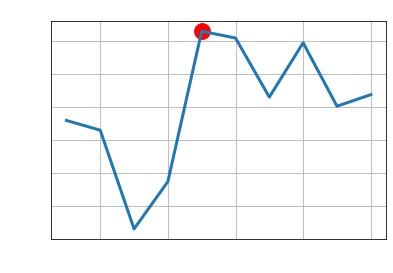

,n_clusters,gap_value,gap*,ref_dispersion_std,sk,sk*,diff,diff*
0,1.0,4.160601,5.258721e+06,16486.139685,0.004026,6.072268e+06,0.002447,6.072071e+06
1,2.0,4.160306,5.257537e+06,8811.597523,0.002151,6.070887e+06,0.004695,6.069066e+06
2,3.0,4.157311,5.245780e+06,6945.771677,0.001700,6.057308e+06,0.001194,6.058100e+06
3,4.0,4.158747,5.250864e+06,10749.623990,0.002630,6.063184e+06,-0.002545,6.063452e+06
4,5.0,4.163307,5.252615e+06,8243.888227,0.002016,6.065202e+06,0.004234,6.064555e+06


In [103]:
# 6.聚类
from demo.optimalK import OptimalK
import matplotlib.pyplot as plt
optimalK = OptimalK(parallel_backend='rust')
x = data
n_clusters = optimalK(x,cluster_array=range(1,11))
print('Optional:',n_clusters)

plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=3)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count',color='w')
plt.ylabel('Gap Value',color='w')
plt.tick_params(color='w',labelcolor='w')
plt.title('Gap Values by Cluster Count',color='w')
plt.show()
optimalK.gap_df.head()

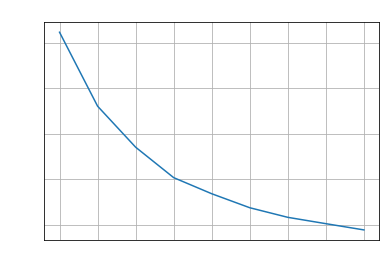

In [12]:
# 选取k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
x_data = data
option = []
for i in range(1,10):
    kmean = KMeans(n_clusters=i)
    kmean.fit(x_data)
    option.append(kmean.inertia_) # inertia 表示每个样本所属簇的标记
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xticks(range(1,10,1))
plt.tick_params(color='w',labelcolor='w')
plt.grid(True)
plt.title('探索最佳的k值',color='w')
id = range(1,10)
plt.plot(id,option)
plt.show()

In [120]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,random_state=666) # random固定，
x = data
kmeans.fit(x) # 实例化，训练
r = pd.concat([x,pd.Series(kmeans.labels_,index=x.index)],axis=1)
r.columns = list(x.columns) + ['class']  # 将数据被判定的类别加入到x_data中
print(r.head()) # 显示前五个

df = pd.DataFrame(kmeans.cluster_centers_,index=[0,1,2,3,4],columns=['L','R','F','M','C']) # cluster_centers_分类簇的均值向量,聚类中心
max_c = df.values.max()
min_c = df.values.min()
df['聚类个数'] = pd.Series(kmeans.labels_).value_counts() # 每个样本所属簇的标记，进行统计
df.index = ['客户群1','客户群2','客户群3','客户群4','客户群5']
df # 得到聚类中心

          L         R          F          M         C  class
0  1.437348 -0.947618  14.054669  26.798874  1.296485      1
1  1.308775 -0.914518   9.087297  13.146445  2.868708      1
2  1.330007 -0.892451   8.732484  12.672433  2.881479      1
3  0.660011 -0.418022   0.784689  12.559423  1.995475      1
4  0.387530 -0.925551   9.938846  13.919344  1.345267      1


,L,R,F,M,C,聚类个数
客户群1,-0.314357,1.682992,-0.572820,-0.535733,-0.173725,12180
客户群2,0.484846,-0.801683,2.487390,2.428475,0.310922,5342
客户群3,0.049311,-0.003508,-0.230177,-0.234103,2.178057,4230
客户群4,-0.699413,-0.414472,-0.160683,-0.160515,-0.256791,24762
客户群5,1.162589,-0.376998,-0.086097,-0.093985,-0.156076,15778


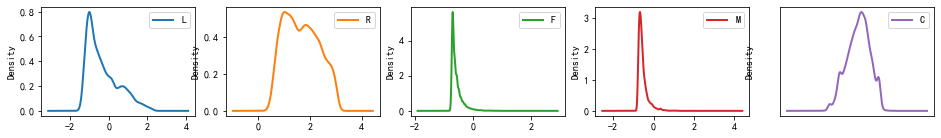

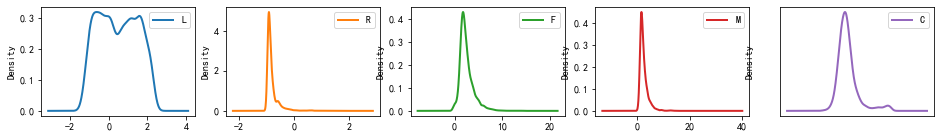

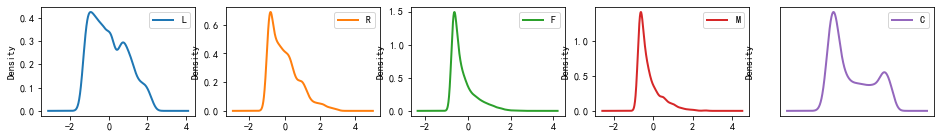

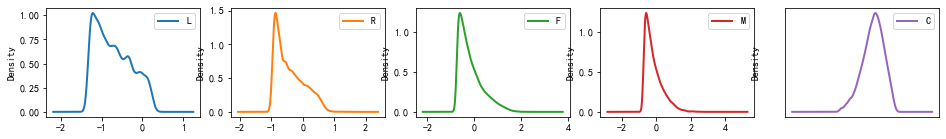

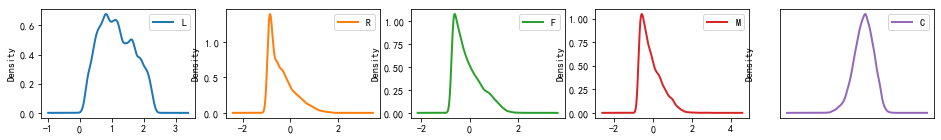

In [103]:
# 可视化聚类结果
for i in range(5):
    x[r['class'] == i].plot(kind='kde',linewidth=2, subplots=True, sharex=False,layout=(1,x.shape[1]),figsize=(16,2))
    plt.legend()
    plt.tick_params(color='w',labelcolor='w')
plt.show()

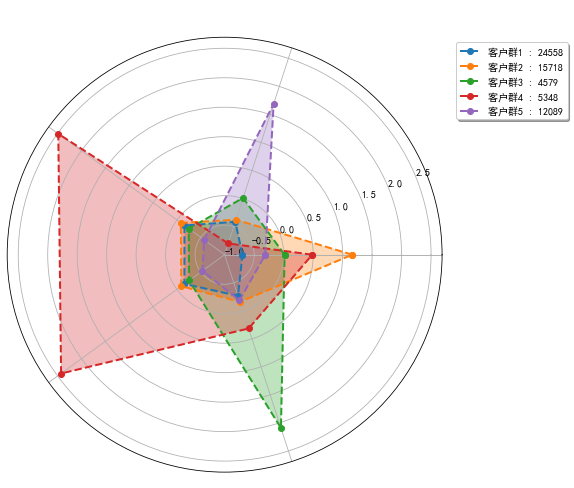

In [106]:
# 绘制雷达图
fig = plt.figure(figsize=(10,8))
# classed_c = ['L','R','F','M','C']
# labels = np.array(['L','R','F','M','C'])
# colors = ["red","green","blue","pink","black"]
ax = fig.add_subplot(111,polar=True)
five = df.values # 聚类中心，最后一列是每一类的总个数
for i,v in enumerate(five):
    # 设置雷达图的角度
    angles = np.linspace(0, 2 * np.pi, 5, endpoint=False)
    labels = np.array(['L','R','F','M','C'])
    center = np.concatenate((v[:-1],[v[0]]))
    angles = np.concatenate((angles,[angles[0]]))
    labels = np.concatenate((labels,[labels[0]]))
    # 绘制折线图
    ax.plot(angles,center,'o--',linewidth=2,label="客户群%d : %d" % (i + 1, v[-1]))

    ax.fill(angles,center,alpha=0.3)
    ax.set_thetagrids(angles * 180 / np.pi,labels,color="w",fontsize=15)
    ax.set_ylim(min_c - 0.2, max_c + 0.2)
    plt.title("LRFCM雷达展示",color="w",fontsize=20)
    ax.grid(True)
    plt.legend(loc='upper right',bbox_to_anchor=(1.3, 1.0), ncol=1, fancybox=True, shadow=True)
plt.show()

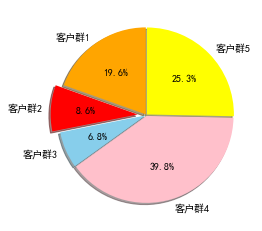

In [119]:
# 绘制饼图
t = df.iloc[:,5].values  # 客户群的数量
ex = [0.01,0.1,0.01,0.01,0.01]
plt.pie(t,explode=ex,labels=df.index,autopct='%1.1f%%',
        shadow=True, startangle=90,colors=["orange","red","skyblue","pink","yellow"])
plt.tick_params(color='w',labelcolor='w')
plt.show()